In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler

import scipy.optimize as opt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import *
import missingno as msno

from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

#SVM
from sklearn import svm
from sklearn.model_selection import cross_val_score


In [2]:
#pip install missingno

In [3]:
#pip install imblearn

In [4]:
#df = pd.read_csv('heart_dataset.csv')
df = pd.read_csv('heart_2020_cleaned.csv')
print(df['HeartDisease'].value_counts()/len(df))
print(df['HeartDisease'].value_counts())

print(df.shape)
df

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Descripción Variables

In [5]:
print(unique_labels(df['Smoking']))
print(unique_labels(df['AlcoholDrinking']))
print(unique_labels(df['Stroke']))
print(unique_labels(df['DiffWalking']))
print(unique_labels(df['Sex']))
print(unique_labels(df['AgeCategory']))
print(unique_labels(df['Race']))
print(unique_labels(df['Diabetic']))
print(unique_labels(df['PhysicalActivity']))
print(unique_labels(df['GenHealth']))
print(unique_labels(df['Asthma']))
print(unique_labels(df['KidneyDisease']))
print(unique_labels(df['SkinCancer']))

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['No' 'Yes']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [8]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Asignar variables categóricas

In [9]:
dic = {'No': 0, 'Yes': 1}
df['HeartDisease'] = df['HeartDisease'].map(dic)#.astype('category')
df['Smoking'] = df['Smoking'].map(dic)#.astype('category')
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)#.astype('category')
df['Stroke'] = df['Stroke'].map(dic)#.astype('category')
df['DiffWalking'] = df['DiffWalking'].map(dic)#.astype('category')
df['PhysicalActivity'] = df['PhysicalActivity'].map(dic)#.astype('category')
df['Asthma'] = df['Asthma'].map(dic)#.astype('category')
df['KidneyDisease'] = df['KidneyDisease'].map(dic)#.astype('category')
df['SkinCancer'] = df['SkinCancer'].map(dic)#.astype('category')

dic = {'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].map(dic)#.astype('category')
 
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [10]:
y = pd.get_dummies(df.Race, prefix='Race')
df = pd.concat([df, y], axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [11]:
df.drop('Race', inplace=True, axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [12]:
df['Race_American Indian/Alaskan Native'] = df['Race_American Indian/Alaskan Native']#.astype('category')
df['Race_Asian'] = df['Race_Asian']#.astype('category')
df['Race_Black'] = df['Race_Black']#.astype('category')
df['Race_Hispanic'] = df['Race_Hispanic']#.astype('category')
df['Race_Other'] = df['Race_Other']#.astype('category')    
df['Race_White'] = df['Race_White']#.astype('category')

In [13]:
#AgeCategory

dic = {}

dic["18-24"] = 0
j = 1
for i in np.arange(25, 80, 5):
    dic[str(i)+"-"+str(i+4)] = j
    j = j+1
    
dic["80 or older"] = j

dic

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

In [14]:
df['AgeCategory'] = df['AgeCategory'].map(dic)#.astype('category')

In [15]:
x = pd.get_dummies(df.Diabetic, prefix='Diabetic')
df = pd.concat([df, x], axis=1)
df.drop('Diabetic', inplace=True, axis=1)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [16]:
df['Diabetic_No'] = df['Diabetic_No']#.astype('category')
df['Diabetic_No, borderline diabetes'] = df['Diabetic_No, borderline diabetes']#.astype('category')
df['Diabetic_Yes'] = df['Diabetic_Yes']#.astype('category')
df['Diabetic_Yes (during pregnancy)'] = df['Diabetic_Yes (during pregnancy)']#.astype('category')

In [17]:
unique_labels(df['GenHealth'])

array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype='<U9')

In [18]:
dic = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}

df['GenHealth'] = df['GenHealth'].map(dic)#.astype('category')


In [19]:

dfNumerical = pd.DataFrame(df, columns=["BMI","PhysicalHealth","MentalHealth","SleepTime"])
dfNumerical.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [20]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


## Gráficos

In [22]:
#sns_plot = sns.pairplot(df, diag_kind='kde', hue ="HeartDisease")
#plt.savefig("pair_plot.png")
#fig = sns_plot.get_figure()
#fig.savefig("pair_plot.png")

In [23]:

#plt.savefig("pair_plot.png")

In [24]:
#Body of Loop
'''y = df[column].values
pie(y)
xlabel('mi grafico')
title('titulo de mi grafico')
legend( ('Etiqueta1',), loc = 'upper left')
draw()
#savefig("mi-grafico1",dpi=300)
#close()
grid(True)
show()'''

'y = df[column].values\npie(y)\nxlabel(\'mi grafico\')\ntitle(\'titulo de mi grafico\')\nlegend( (\'Etiqueta1\',), loc = \'upper left\')\ndraw()\n#savefig("mi-grafico1",dpi=300)\n#close()\ngrid(True)\nshow()'

In [25]:
'''for column in df:
    #Body of Loop
    y = df[column].values
    pie(y)
    xlabel('mi grafico')
    title('titulo de mi grafico')
    legend( ('Etiqueta1',), loc = 'upper left')
    draw()
    #savefig("mi-grafico1",dpi=300)
    #close()
    grid(True)
    show()'''

'for column in df:\n    #Body of Loop\n    y = df[column].values\n    pie(y)\n    xlabel(\'mi grafico\')\n    title(\'titulo de mi grafico\')\n    legend( (\'Etiqueta1\',), loc = \'upper left\')\n    draw()\n    #savefig("mi-grafico1",dpi=300)\n    #close()\n    grid(True)\n    show()'

## Normalizar los datos

In [26]:
scaler_x = MinMaxScaler()
#data = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']]
#data

In [27]:
#scaler_x = MinMaxScaler()
#data = df['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']
scaler_x.fit(df)
data_scaled = scaler_x.transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
print(df_scaled)

        HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.055294      1.0              0.0     0.0   
1                0.0  0.100447      0.0              0.0     1.0   
2                0.0  0.175782      1.0              0.0     0.0   
3                0.0  0.147169      0.0              0.0     0.0   
4                0.0  0.141132      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
319790           1.0  0.185802      1.0              0.0     0.0   
319791           0.0  0.215139      1.0              0.0     0.0   
319792           0.0  0.147531      0.0              0.0     0.0   
319793           0.0  0.250996      0.0              0.0     0.0   
319794           0.0  0.416999      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  ...  \
0             0.100000           1.0          0.0  1.0     0.583333  ...   
1             0.000000         

In [28]:
#df[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']] = df_scaled[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']]

In [29]:
df = df_scaled
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0.0,0.055294,1.0,0.0,0.0,0.100000,1.0,0.0,1.0,0.583333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.100447,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.175782,1.0,0.0,0.0,0.666667,1.0,0.0,0.0,0.750000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.147169,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.916667,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.141132,0.0,0.0,0.0,0.933333,0.0,1.0,1.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.185802,1.0,0.0,0.0,0.233333,0.0,1.0,0.0,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
319791,0.0,0.215139,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.250000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319792,0.0,0.147531,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.416667,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
319793,0.0,0.250996,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.083333,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.196854,0.412477,0.068097,0.037740,0.112390,0.129946,0.138870,0.524727,0.542878,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,0.076737,0.492281,0.251912,0.190567,0.265028,0.265175,0.345812,0.499389,0.297063,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.144996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.184957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.583333,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.234215,1.000000,0.000000,0.000000,0.066667,0.100000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## No hay NaN 

In [31]:
print(len(df))

df.dropna()

print(len(df))

319795
319795


## No Tocar

In [32]:
'''df_cocat= pd.read_csv('heart_2020_cleaned.csv')

dic = {'No': 0, 'Yes': 1}
df_cocat['HeartDisease'] = df['HeartDisease'].map(dic)
df_cocat['Smoking'] = df['Smoking'].map(dic)
df_cocat['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)
df_cocat['Stroke'] = df['Stroke'].map(dic)
df_cocat['DiffWalking'] = df['DiffWalking'].map(dic)
df_cocat['PhysicalActivity'] = df['PhysicalActivity'].map(dic)
df_cocat['Asthma'] = df['Asthma'].map(dic)
df_cocat['KidneyDisease'] = df['KidneyDisease'].map(dic)
df_cocat['SkinCancer'] = df['SkinCancer'].map(dic)
dic = {'Male': 0, 'Female': 1}
df_cocat['Sex'] = df['Sex'].map(dic)

y = pd.get_dummies(df_cocat.Race, prefix='Race')
df_cocat = pd.concat([df_cocat, y], axis=1)

df_cocat.drop('Race', inplace=True, axis=1)'''

"df_cocat= pd.read_csv('heart_2020_cleaned.csv')\n\ndic = {'No': 0, 'Yes': 1}\ndf_cocat['HeartDisease'] = df['HeartDisease'].map(dic)\ndf_cocat['Smoking'] = df['Smoking'].map(dic)\ndf_cocat['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)\ndf_cocat['Stroke'] = df['Stroke'].map(dic)\ndf_cocat['DiffWalking'] = df['DiffWalking'].map(dic)\ndf_cocat['PhysicalActivity'] = df['PhysicalActivity'].map(dic)\ndf_cocat['Asthma'] = df['Asthma'].map(dic)\ndf_cocat['KidneyDisease'] = df['KidneyDisease'].map(dic)\ndf_cocat['SkinCancer'] = df['SkinCancer'].map(dic)\ndic = {'Male': 0, 'Female': 1}\ndf_cocat['Sex'] = df['Sex'].map(dic)\n\ny = pd.get_dummies(df_cocat.Race, prefix='Race')\ndf_cocat = pd.concat([df_cocat, y], axis=1)\n\ndf_cocat.drop('Race', inplace=True, axis=1)"

### Correlaciones

Como se puede observar en la tabla de debajo ninguna variable numérica se encuentra correlacionada a más de 0.5 en valor absoluto con otra variable numérica del dataset

In [33]:
correl=df.corr(method='spearman')

#correl[abs(correl) >= 0.5]
correl

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
HeartDisease,1.000000,0.057355,0.107764,-0.032080,0.196835,0.143064,-0.003444,0.201258,-0.070040,0.239298,...,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,-0.170977,0.016182,0.183072,-0.013930
BMI,0.057355,1.000000,0.028788,-0.039295,0.021597,0.093134,0.024011,0.154506,-0.064332,0.006298,...,0.026708,-0.087101,0.076363,0.026599,0.008243,-0.043445,-0.206610,0.050316,0.201951,0.005599
Smoking,0.107764,0.028788,1.000000,0.111768,0.061226,0.092659,0.050658,0.120074,-0.085052,0.122055,...,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367,-0.055127,0.007143,0.058434,-0.005385
AlcoholDrinking,-0.032080,-0.039295,0.111768,1.000000,-0.019858,-0.012853,0.056525,-0.035328,-0.004200,-0.062234,...,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342,0.057644,-0.008165,-0.058208,-0.004077
Stroke,0.196835,0.021597,0.061226,-0.019858,1.000000,0.116252,0.026438,0.174143,0.003091,0.140245,...,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154,-0.102787,0.011172,0.108407,-0.004526
PhysicalHealth,0.143064,0.093134,0.092659,-0.012853,0.116252,1.000000,0.276983,0.355052,0.062744,0.057390,...,0.019108,-0.039085,0.016052,-0.012951,0.015490,0.000907,-0.136290,0.019338,0.138636,0.005802
MentalHealth,-0.003444,0.024011,0.050658,0.056525,0.026438,0.276983,1.000000,0.107651,0.137340,-0.231967,...,0.014166,-0.020907,0.004124,-0.002033,0.028475,-0.009887,-0.005192,0.004283,-0.002794,0.024726
DiffWalking,0.201258,0.154506,0.120074,-0.035328,0.174143,0.355052,0.107651,1.000000,0.068860,0.243872,...,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516,-0.209640,0.031843,0.216605,-0.007040
Sex,-0.070040,-0.064332,-0.085052,-0.004200,0.003091,0.062744,0.137340,0.068860,1.000000,0.066597,...,0.003434,-0.013716,0.037280,0.003607,-0.008762,-0.017314,-0.003636,0.004295,-0.020718,0.085477
AgeCategory,0.239298,0.006298,0.122055,-0.062234,0.140245,0.057390,-0.231967,0.243872,0.066597,1.000000,...,-0.026835,-0.081475,-0.037608,-0.161293,-0.060367,0.193959,-0.202832,0.047967,0.210008,-0.036189


In [34]:
df.iloc[:, 0]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
319790    1.0
319791    0.0
319792    0.0
319793    0.0
319794    0.0
Name: HeartDisease, Length: 319795, dtype: float64

In [35]:
correl2 = correl[(abs(correl) != 1)]
correl2 = correl2[(abs(correl2) >= 0.5)]
correl2.dropna()
correl2

l =[]
for c in correl:
    for r in correl:
        #print(correl[c][r])
        if abs(correl[c][r]) > 0.4 and correl[c][r] != 1:
            l.append(c+" && " + r +": " + str(correl[c][r]))
            
print(l)

['PhysicalHealth && GenHealth: -0.40792639880573317', 'GenHealth && PhysicalHealth: -0.40792639880573317', 'Race_Black && Race_White: -0.5040402992221741', 'Race_Hispanic && Race_White: -0.5555711160223381', 'Race_White && Race_Black: -0.5040402992221741', 'Race_White && Race_Hispanic: -0.5555711160223381', 'Diabetic_No && Diabetic_Yes: -0.886841227138652', 'Diabetic_Yes && Diabetic_No: -0.886841227138652']


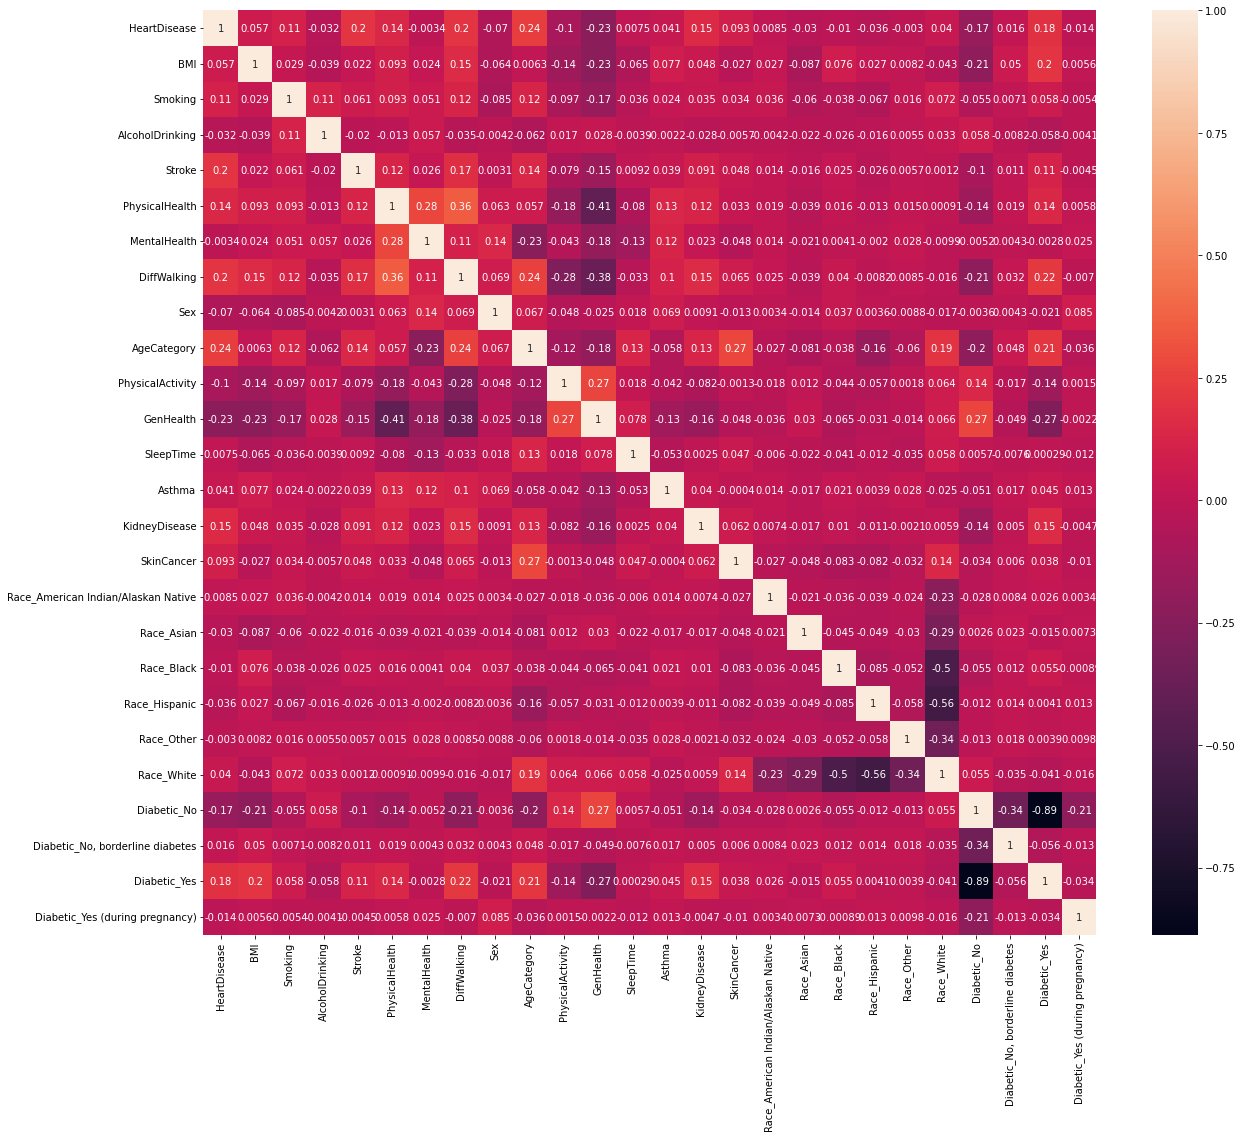

In [36]:
plt.rcParams["figure.figsize"] = (20, 17)
heatMap = sns.heatmap(correl, 
        xticklabels=correl.columns,
        yticklabels=correl.columns, annot = True)
plt.savefig("corr_heatMap.png")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

Index(['GenHealth', 'Diabetic_No', 'PhysicalActivity', 'Sex', 'Race_Hispanic',
       'AlcoholDrinking', 'Race_Asian', 'Diabetic_Yes (during pregnancy)',
       'Race_Black', 'MentalHealth', 'Race_Other', 'SleepTime',
       'Race_American Indian/Alaskan Native',
       'Diabetic_No, borderline diabetes', 'Race_White', 'Asthma', 'BMI',
       'SkinCancer', 'Smoking', 'PhysicalHealth', 'KidneyDisease',
       'Diabetic_Yes', 'Stroke', 'DiffWalking', 'AgeCategory', 'HeartDisease'],
      dtype='object')
GenHealth                             -0.225173
Diabetic_No                           -0.170977
PhysicalActivity                      -0.100030
Sex                                   -0.070040
Race_Hispanic                         -0.036163
AlcoholDrinking                       -0.032080
Race_Asian                            -0.030262
Diabetic_Yes (during pregnancy)       -0.013930
Race_Black                            -0.010156
MentalHealth                          -0.003444
Race_Other   

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/3674573424.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  heatMap = sns.heatmap(order[:, np.newaxis], xticklabels=["HeartDisease"],


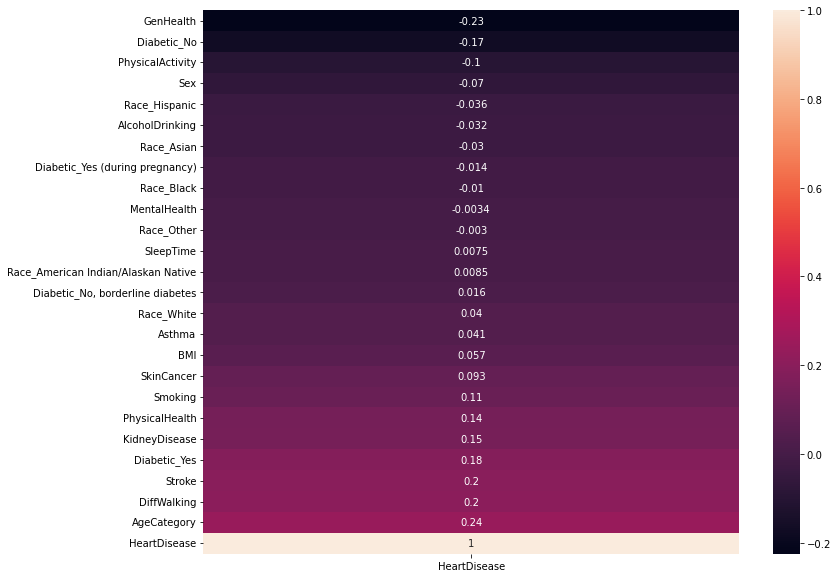

In [37]:
#print(correl["HeartDisease"].sort_values())
plt.rcParams["figure.figsize"] = (12, 10)
order = correl["HeartDisease"].sort_values();
print(order.index)
print(order)
#order = correl["HeartDisease"].map(lambda x : x[0]).abs().sort_values(ascending = False)
heatMap = sns.heatmap(order[:, np.newaxis], xticklabels=["HeartDisease"],
        yticklabels=order.index, annot = True)
plt.savefig("corr_heatMap_HeartDisease.png")
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [38]:
#df_copia = df.copy()
df_copia = df[['HeartDisease', 'AgeCategory', 'DiffWalking', 'Diabetic_Yes', 'KidneyDisease', 'PhysicalHealth', 'Smoking', 'GenHealth', 'Diabetic_No', 'PhysicalActivity']]
df_copia

,HeartDisease,AgeCategory,DiffWalking,Diabetic_Yes,KidneyDisease,PhysicalHealth,Smoking,GenHealth,Diabetic_No,PhysicalActivity
0,0.0,0.583333,0.0,1.0,0.0,0.100000,1.0,0.75,0.0,1.0
1,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.75,1.0,1.0
2,0.0,0.750000,0.0,1.0,0.0,0.666667,1.0,0.25,0.0,1.0
3,0.0,0.916667,0.0,0.0,0.0,0.000000,0.0,0.50,1.0,0.0
4,0.0,0.333333,1.0,0.0,0.0,0.933333,0.0,0.75,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
319790,1.0,0.666667,1.0,1.0,0.0,0.233333,1.0,0.25,0.0,0.0
319791,0.0,0.250000,0.0,0.0,0.0,0.000000,1.0,0.75,1.0,1.0
319792,0.0,0.416667,0.0,0.0,0.0,0.000000,0.0,0.50,1.0,1.0
319793,0.0,0.083333,0.0,0.0,0.0,0.000000,0.0,0.50,1.0,0.0


## Balanceado datos

In [39]:
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]


In [40]:
smote = SMOTE(random_state=1000)
#XSmote, YSmote = smote.fit_resample(X,Y)
            

In [41]:
rus = RandomUnderSampler(random_state=1000)
#Xrus, Yrus = rus.fit_resample(X,Y)

In [42]:
nm = NearMiss()
#XnearMiss, YnearMiss = nm.fit_resample(X,Y)


In [43]:
#print(np.unique(YSmote, return_counts=True))
#print(np.unique(Yrus, return_counts=True))
#print(np.unique(YnearMiss, return_counts=True))

In [44]:
#print(len(YnearMiss==0))
#print(YnearMiss==1)

## División Training, Validación y Test

In [45]:
def train_validation_test(X, Y, sampler):
    RANDOM_STATE = 7777
    #Dividimos los datos en training y test con 0.6 training y 0.4 test
    X_train, X_temp, Y_train, Y_temp  = train_test_split(X, Y, test_size=0.4, random_state=RANDOM_STATE, stratify=Y)
    
    X_train, Y_train = sampler.fit_resample(X_train,Y_train)
    
    #Los datos de test los volvemos a dividir en 0.2 validación y 0.2 test
    X_val , X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=Y_temp)
    return X_train,Y_train, X_val,Y_val, X_test,Y_test


In [46]:

X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
print(np.unique(Y_train, return_counts=True))
print(np.unique(Y_val, return_counts=True))
print(np.unique(Y_test, return_counts=True))

(array([0., 1.]), array([16424, 16424]))
(array([0., 1.]), array([58484,  5475]))
(array([0., 1.]), array([58485,  5474]))


### Curva aprendizaje para visualizar under y overfitting

In [47]:
def draw_learning_curve(err1, err2, title, label, lmb):
    #l = np.arange(len(err1))
    #l = l+1
    b = err1
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel("Recall")
    plt.plot(lmb, b, c="blue", label="Train")
    
    d = err2[0:len(err1)]
    plt.plot(lmb, d, c="orange", label="Cross Validation")
    plt.legend()

## Regresión logística

In [48]:
def sigmoid_funct(z):
    #z=np.array(z,dtype=np.float)
    return 1 / (1 + np.exp(-z))

def func_coste_reg(Thetas, X, Y, lmb, m):
    return cost_funct(Thetas, X, Y) + regularizacion(Thetas[1:], lmb, m)

def regularizacion(Thetas, lmb, m):
    return (lmb/(2*m))*np.sum(Thetas**2)

def func_grad_reg(Thetas, X, Y, lmb, m):
    return np.add(gradient(Thetas, X, Y), reg_grad(Thetas[1:], lmb, m))

def reg_grad(Thetas, lmb, m):
        return np.insert(lmb/m*Thetas, 0, values=[0])
    
def cost_funct(Theta, X, Y):
    g = sigmoid_funct(np.matmul(X, Theta))
    m = np.shape(X)[0]
    
    J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
    return np.sum(-J)/m

def gradient(Theta, X, Y):
    m = np.shape(X)[0]
    g = sigmoid_funct(np.matmul(X,Theta))
    #print("f" ,g)
    J = np.dot(np.transpose(X), (g - Y))
    #print("X" ,np.matmul((g - Y), X))
    return J/m

In [49]:
## ELIMINAR SOLO ESTA DE REFERENCIA
def logistic_regresion():
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    m = np.shape(X)[0]
    # Aregamos una columna de 1s
    X = np.hstack([np.ones([m, 1]), X])
    n = np.shape(X)[1]
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]

    Theta = np.zeros(n)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient, args=(X,Y), messages=0)
    theta_opt = result[0]
    
    print("theta optimizada:", theta_opt)
    print("Coste final:" , cost_funct(theta_opt, X,Y))
    pinta_frontera_recta(X, Y, theta_opt)
    #aux()
    porcentaje =  porcentaje_aciertos(theta_opt, X, Y)
    print(porcentaje)
    

In [50]:
def porcentaje_aciertos(Theta, X, Y):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    sigmoid = sigmoid_funct(np.matmul(X, Theta))

    # Se compara la estimacion nuestra con el resultado real (Y).
    # Se devuelve el numeros de ejemplos que se han estimado
    # correctamente, es decir, para aquellos que tengan
    # el resultado del sigmoide mayor o igual a 0.5
    evaluation_correct = np.sum((sigmoid >= 0.5) == Y)
    
    #print(classification_report(Y,(sigmoid >= 0.5), target_names=["no", "si"]))
    #print(confusion_matrix(Y,(sigmoid >= 0.5)))
    
    #Obtenemos la especificidad y la sensibilidad
    recall_0 = confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")[0][0]
    if(len(confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")) < 2):
        if(np.sum(Y) == 0):
            recall_1 = 1
        else:
            recall_1 = 0
    else:
        recall_1 = confusion_matrix(Y,(sigmoid >= 0.5), normalize = "true")[1][1]
    #print(recall_0)
    #print(recall_1)
    #print(len(Y))
    #harm_recall = 2/((1.0/recall_0) + (1.0/recall_1)) 
    # Devolvemos el porcentaje
    #return harm_recall
    return recall_1

In [51]:
def mainRL_Data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul, name):
    #Obtencion de todas las columnas de la tabla menos la de salida la primera
    m = np.shape(X_train)[0]

    print((Y_train== 0).sum())
    print( (Y_train== 1).sum() )
    #Inicializamos las Thetas a 0
    
    #print(Thetas)
    
    #Si la representación que le pasamos al algoritmo no tiene la primera columna ya puesta como 1 se la ponemos dentro
    if(mul == False):
        # Agregamos una columna de 1s
        X_train = np.hstack([np.ones([m, 1]), X_train])

        m_val = np.shape(X_val)[0]
        print(m_val)
        # Agregamos una columna de 1s
        X_val = np.hstack([np.ones([m_val, 1]), X_val])

        m_t = np.shape(X_test)[0]
        print(m_t)
        # Agregamos una columna de 1s
        X_test = np.hstack([np.ones([m_t, 1]), X_test])
    
    print(np.shape(X_train))
    errorT = []
    errorV = []
    
    n = np.shape(X_train)[1]
    print(n)
    Thetas = np.zeros(n)

    Max = 0
    LambdaF= 0
    rangeVals= [];
    for data in range(10,m,1000):
        rangeVals.append(data)
        #Para cada lambda calculamos las Thetas óptimas, pintamos la función y sacamos el porcentaje de aciertos
        for i in lmb:
            #print("cost",func_coste_reg(Thetas, X, Y, i, m))
            #print("grad",func_grad_reg(Thetas, X, Y, i, m))
            result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train[0:data],Y_train[0:data],i,m), messages=0)
            #print("Lambda: " , i)
            errorT.append(porcentaje_aciertos(result[0], X_train[0:data], Y_train[0:data]))

            #print(result[0])
            porcentaje =  porcentaje_aciertos(result[0], X_val, Y_val)
            errorV.append(porcentaje)
            if(porcentaje > Max):
                Max = porcentaje
                LambdaF = i
            #print("Media harmónica de la sensibilidad y la especificidad: " + str(porcentaje))
    
    draw_learning_curve(errorT, errorV, "Regresion Lineal", "Num training examples", rangeVals)
    plt.savefig(name)
    #Test
    print("Valores en test")
    print("Para lambda: " + str(LambdaF))
    result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,LambdaF,m), messages=0)
    #print("Lambda: " , i)
    print(result[0])
    porcentaje =  porcentaje_aciertos(result[0], X_test, Y_test)
    #print("Media armónica de la sensibilidad y la especificidad: " + str(porcentaje))
    print("Recall para la clase 1: " + str(porcentaje))

[[0.16666667 0.         0.         ... 0.5        1.         1.        ]
 [0.41666667 0.         0.         ... 0.75       1.         1.        ]
 [0.33333333 0.         0.         ... 0.5        1.         1.        ]
 ...
 [0.75       0.         0.         ... 0.75       1.         1.        ]
 [0.75       0.         0.         ... 0.5        1.         0.        ]
 [0.91666667 1.         1.         ... 0.25       0.         0.        ]]
[0. 0. 0. ... 0. 0. 0.]
[[1.         0.16666667 0.         ... 1.         1.         1.        ]
 [1.         0.41666667 0.         ... 1.         1.         1.        ]
 [1.         0.33333333 0.         ... 1.         1.         1.        ]
 ...
 [1.         0.75       0.         ... 1.         1.         1.        ]
 [1.         0.75       0.         ... 0.         0.         0.        ]
 [1.         0.91666667 1.         ... 0.         0.         0.        ]]
16424
16424
(32848, 715)
715


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: RuntimeWarning: invalid value encountered in matmul
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: Runtime

Valores en test
Para lambda: 0


/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:21: RuntimeWarning: divide by zero encountered in log
  J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))


[-6.66386078e-01  1.98199048e+00  2.72111068e-01  3.93486462e-01
  1.00561168e+00  2.55026408e-01 -1.53828717e-01 -3.05018406e+00
 -3.62842560e-02 -1.50579077e-01  1.93624550e+00  3.69441215e-01
 -9.45157227e-01  1.93186096e+00 -6.38557172e-01  7.98534797e-01
  1.57699705e-01  3.37547051e-01  1.00948961e-01  2.72111068e-01
  2.18413553e-02 -4.29979072e-01 -1.26273895e+00 -5.66026472e-01
 -2.29084323e+00  3.99522082e-02  2.38869183e-01  3.93486462e-01
 -6.50768588e-01  3.01594096e-01  2.51079025e-01 -5.22213630e-01
  0.00000000e+00 -3.42571498e-01  1.00561168e+00  3.59655077e+00
  2.28731709e+00 -3.30648027e-01 -6.75393294e-01 -6.49776747e-01
 -1.19135995e+00  3.57333285e-01  2.38843005e+00  7.86827401e-01
  4.09104769e-01 -1.53828717e-01 -1.07191469e+00  2.54455670e-01
  2.20582001e-01  5.99050630e-01 -1.16142045e+00  6.70519399e-01
 -3.62842560e-02 -6.52624118e-02 -1.50579077e-01 -4.95345086e-01
 -4.31345647e-01 -1.00154678e-01 -4.60428546e-01  2.07351814e+00
 -4.72130210e-01  4.91476

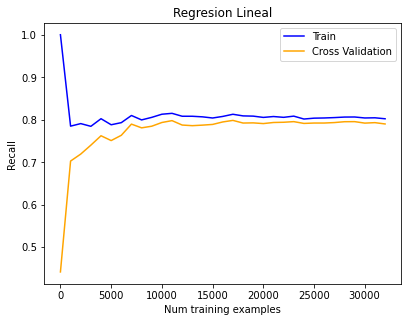

In [52]:


df_array = np.array(df_copia)

X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]
#print(Y)
#No regularizamos
lmb = [0]
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)



print(X_train)
print(Y_train)
#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(4)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

print(X_train)

mainRL_Data(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True, "Lmb_0_Pol1.png")

In [53]:

def mainRL(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul):
    #Obtencion de todas las columnas de la tabla menos la de salida la primera
    m = np.shape(X_train)[0]

    print((Y_train== 0).sum())
    print( (Y_train== 1).sum() )
    #Inicializamos las Thetas a 0
    
    #print(Thetas)
    
    #Si la representación que le pasamos al algoritmo no tiene la primera columna ya puesta como 1 se la ponemos dentro
    if(mul == False):
        # Agregamos una columna de 1s
        X_train = np.hstack([np.ones([m, 1]), X_train])

        m_val = np.shape(X_val)[0]
        print(m_val)
        # Agregamos una columna de 1s
        X_val = np.hstack([np.ones([m_val, 1]), X_val])

        m_t = np.shape(X_test)[0]
        print(m_t)
        # Agregamos una columna de 1s
        X_test = np.hstack([np.ones([m_t, 1]), X_test])
    
    print(np.shape(X_train))
    errorT = []
    errorV = []
    
    n = np.shape(X_train)[1]
    print(n)
    Thetas = np.zeros(n)

    Max = 0
    LambdaF= 0
    #Para cada lambda calculamos las Thetas óptimas, pintamos la función y sacamos el porcentaje de aciertos
    for i in lmb:
        result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,i,m), messages=0)
        #print("Lambda: " , i)
        errorT.append(porcentaje_aciertos(result[0], X_train, Y_train))

        #print(result[0])
        porcentaje =  porcentaje_aciertos(result[0], X_val, Y_val)
        errorV.append(porcentaje)
        if(porcentaje > Max):
            Max = porcentaje
            LambdaF = i
        print("Media harmónica de la sensibilidad y la especificidad: " + str(porcentaje))

    draw_learning_curve(errorT, errorV, "Regresion Lineal", "lambda", lmb)
    plt.savefig("Error_test_val.png")
    #Test
    print("Valores en test")
    print("Para lambda: " + str(LambdaF))
    result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X_train,Y_train,LambdaF,m), messages=0)
    #print("Lambda: " , i)
    print(result[0])
    porcentaje =  porcentaje_aciertos(result[0], X_test, Y_test)
    #print("Media armónica de la sensibilidad y la especificidad: " + str(porcentaje))
    print("Recall para la clase 1: " + str(porcentaje))

[[1.         0.17638537 0.         ... 0.         0.         0.        ]
 [1.         0.19642642 1.         ... 0.         0.         0.        ]
 [1.         0.27924665 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.42834722 0.         ... 1.         0.         0.        ]
 [1.         0.17916214 1.         ... 1.         0.         0.        ]
 [1.         0.13388869 1.         ... 0.         0.         0.        ]]
16424
16424
(32848, 351)
351
Media harmónica de la sensibilidad y la especificidad: 0.7888584474885845
Media harmónica de la sensibilidad y la especificidad: 0.7892237442922374
Media harmónica de la sensibilidad y la especificidad: 0.7892237442922374
Media harmónica de la sensibilidad y la especificidad: 0.7892237442922374
Media harmónica de la sensibilidad y la especificidad: 0.7890410958904109
Media harmónica de la sensibilidad y la especificidad: 0.7899543378995434
Media harmónica de la sensibilidad y la especificidad: 0.7903196347031963
Media har

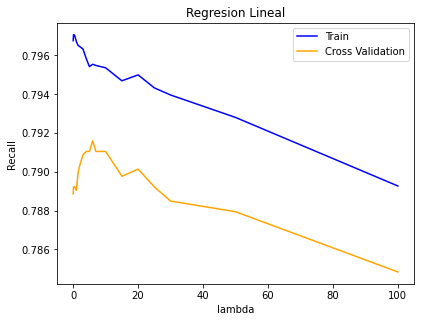

In [54]:
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

lmb = [0,0.1,0.25,0.5,1,1.5, 2,3,4,5,6,7,10,15,20,25,30,50,100]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = [1]
#lmb = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]
#X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(Xrus, Yrus)

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

print(X_train)

mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True)

[[1.         0.75       0.         ... 1.         1.         1.        ]
 [1.         0.33333333 0.         ... 0.75       1.         1.        ]
 [1.         1.         0.         ... 0.5        1.         1.        ]
 ...
 [1.         0.83333333 1.         ... 0.5        0.         1.        ]
 [1.         0.83333333 0.         ... 0.75       0.         1.        ]
 [1.         0.75       0.         ... 0.25       1.         1.        ]]
16424
16424
(32848, 10)
10
Media harmónica de la sensibilidad y la especificidad: 0.7744292237442922
Media harmónica de la sensibilidad y la especificidad: 0.7744292237442922
Media harmónica de la sensibilidad y la especificidad: 0.7760730593607306
Media harmónica de la sensibilidad y la especificidad: 0.776986301369863
Media harmónica de la sensibilidad y la especificidad: 0.776986301369863
Media harmónica de la sensibilidad y la especificidad: 0.7793607305936073
Media harmónica de la sensibilidad y la especificidad: 0.7821004566210046
Media harmóni

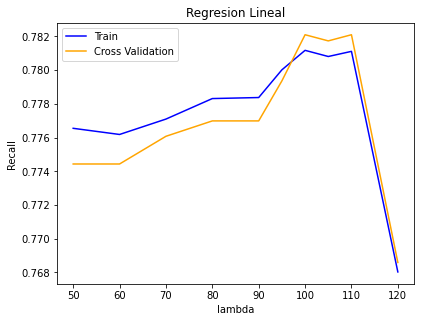

In [55]:
#DataFrame solo con 10 variables
df_array = np.array(df_copia)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,0.25,0.5,1,1.5, 2,3,4,5,6,7,10,15,20,25,30,50,100]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = [1]
#lmb = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]
#X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(Xrus, Yrus)

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)

#Metemos más variables si es necesario, con esto estamos intentando que se produzca un overfitting
#Combinaciones de 2
poly = PolynomialFeatures(1)
X_train = poly.fit_transform(X_train)
X_val = poly.fit_transform(X_val)
X_test = poly.fit_transform(X_test)

print(X_train)

mainRL(X_train,Y_train, X_val,Y_val, X_test,Y_test, lmb, True)

## Redes neuronales

In [56]:
def func_coste_reg(Thetas, X, Y, lmb):
    m = np.shape(X)[0]
    return cost_funct(Y, X, m) + regularizacion(Thetas, lmb, m)

def cost_funct(Y, g, m):
    J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
    return J/m

def regularizacion(Thetas, lmb, m):
    suma = 0
    for i in Thetas:
        i = i[:,1:]
        suma += (np.sum(i**2))
    
    return (lmb/(2*m))*suma

In [57]:
def forward_propagation(X, theta1, theta2, m, Y):

    #Capa entrada asignamos la X con los unos incluidos
    a1 = np.hstack([np.ones([m, 1]), X])
    #capa intermedia (hidden) calculamos las ecuaciones de la anterior, aplicamos la sigmoide e incluimos los unos de la neurona 0 
    z2 = np.dot(a1, theta1.T)

    a2 = np.hstack([np.ones([m, 1]), sigmoid_funct(z2)])

    #Capa salida calcuamos las ecuaciones con theta2 y aplicamos la sigmoide, nos devuelve la matriz de salida 5000x10
    z3 = np.dot(a2, theta2.T)

    a3 = sigmoid_funct(z3)
    
    return a1, z2, a2, z3, a3

In [58]:
#Genera los pesos aleatorios
def RandomWeights(entradas, salidas, ini):
    Theta = np.random.uniform(-ini, ini, size = (salidas,entradas+1))
    return Theta

In [59]:
    
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, Y, reg):    
    #Recostruimos las Thetas
    Theta1 = np.reshape(params_rn[:num_ocultas *(num_entradas + 1)],(num_ocultas, (num_entradas+1)))
    Theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1): ], (num_etiquetas,(num_ocultas+1)))

    m = X.shape[0]    
    y_onehot = Y
    
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, y_onehot)
    #Calculamos el coste
    coste = func_coste_reg([Theta1, Theta2], a3, y_onehot, reg)


    d3 = a3 - y_onehot
    d2 = np.matmul(Theta2.T,d3.T)*(a2*(1-a2)).T
    
    #Calculamos los gradientes no regularizados
    G1 = np.matmul(d2[1:,:], a1)/m
    G2 = np.matmul(d3.T,a2)/m
    
    #Calculamos los gradientes regularizados
    G1 = G1 + ((reg*1.0)/m)*np.insert(Theta1[:, 1:], 0, 0, axis = 1)
    G2 = G2 + ((reg*1.0)/m)*np.insert(Theta2[:, 1:], 0, 0, axis = 1)

    #Ponemos los gradientes en forma de lista
    gradientes = np.concatenate((G1, G2), axis = None)

    return coste, gradientes

In [60]:
def porcentaje_aciertos_RN(a3, X, Y, show):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    if(show):
        print(classification_report(Y,(a3 >= 0.5), target_names=["no", "si"]))
    
    #Obtenemos la especificidad y la sensibilidad
    recall_0 = confusion_matrix(Y,(a3 >= 0.5), normalize = "true")[0][0]
    if(len(confusion_matrix(Y,(a3 >= 0.5), normalize = "true")) < 2):
        if(np.sum(Y) == 0):
            recall_1 = 1
        else:
            recall_1 = 0
    else:
        recall_1 = confusion_matrix(Y, (a3 >= 0.5) , normalize = "true")[1][1]
    #print(recall_0)
    #print(recall_1)
    #print(len(Y))
    #harm_recall = 2/((1.0/recall_0) + (1.0/recall_1)) 
    # Devolvemos el porcentaje
    #return harm_recall
    return recall_1

In [61]:
def optimize_backprop_and_check_test ( X_test,Y_test, Theta1, Theta2):
   
    #Resultados para Test
    m = X_test.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X_test, Theta1, Theta2, m, Y_test)
    
    #Sacamos los aciertos
    Y_test = Y_test.ravel()
    accT = porcentaje_aciertos_RN(a3, X_test, Y_test, True)
    
    return accT

In [62]:
def optimize_backprop_and_check (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, ini):
    
    #Inicializamos los pesos y los ponemos en forma de lista   
    Theta1 = RandomWeights(num_entradas, num_ocultas, ini)
    Theta2 = RandomWeights(num_ocultas, num_etiquetas, ini)
    pesos = np.concatenate((Theta1, Theta2), axis=None)

    m = X.shape[0]
    #Optimizamos
    out = opt.minimize(fun = backprop, x0 = pesos, args = (num_entradas, num_ocultas, num_etiquetas, X, Y, reg), method='TNC', jac = True, options = {'maxiter': laps})

    #Reconstruimos las Thetas
    Theta1 = out.x[:(num_ocultas*(num_entradas+1))].reshape(num_ocultas,(num_entradas+1))
    Theta2 = out.x[(num_ocultas*(num_entradas+1)):].reshape(num_etiquetas,(num_ocultas+1))
    
    return Theta1, Theta2

In [63]:
def optimize_backprop_training_validation (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, ini, X_val, Y_val):
    
    Theta1, Theta2 = optimize_backprop_and_check (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, ini)
    #Resultados para val
    m_val = X_val.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X_val, Theta1, Theta2, m_val, Y_val)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    accV = porcentaje_aciertos_RN(a3, X_val, Y_val, False)
    
    #Resultados para Training
    m = X.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, Y)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    accT = porcentaje_aciertos_RN(a3, X, Y, False)
    
    return accV, accT, Theta1, Theta2

In [64]:
def optimize_backprop_and_check_data (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, ini, X_val, Y_val):
    
    #Inicializamos los pesos y los ponemos en forma de lista   
    Theta1 = RandomWeights(num_entradas, num_ocultas, ini)
    Theta2 = RandomWeights(num_ocultas, num_etiquetas, ini)
    pesos = np.concatenate((Theta1, Theta2), axis=None)

    #Optimizamos
    out = opt.minimize(fun = backprop, x0 = pesos, args = (num_entradas, num_ocultas, num_etiquetas, X, Y, reg), method='TNC', jac = True, options = {'maxiter': laps})

    #Reconstruimos las Thetas
    Theta1 = out.x[:(num_ocultas*(num_entradas+1))].reshape(num_ocultas,(num_entradas+1))
    Theta2 = out.x[(num_ocultas*(num_entradas+1)):].reshape(num_etiquetas,(num_ocultas+1))
    
    m_val = X_val.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X_val, Theta1, Theta2, m_val, Y_val)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    acc = porcentaje_aciertos_RN(a3, X_val, Y_val)
    
    
    #Resultado para Training
    m = X.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, Y)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    acc2 = porcentaje_aciertos_RN(a3, X, Y)
    
    #print("Training: ",acc2)
    
    return acc

In [65]:
def main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, mul, name, num_hiden_layers):
    #Check del gradiente con reg
    #print(grad.checkNNGradients(backprop, reg))
    
    num_labels = 1
    
    num_entries = np.shape(X_train)[1]
    #num_hiden_layers = 5
    reg = 0.01
    
    
    y = np.array([Y_train])
    y = y.T
    
    Y_val = np.array([Y_val])
    Y_val = Y_val.T
    errorV = []
    errorT = []
    Theta1F = []
    Theta2F  = []
    rangeVals = []
    Max = 0
    #print(y)
    for data in range(10,m,10000):
        rangeVals.append(data)
        acc_val, acc_training, Theta1, Theta2 = optimize_backprop_training_validation(num_entries, num_hiden_layers, num_labels, reg, X_train[:data], 250, y[:data], 0.2, X_val, Y_val)
        errorV.append(acc_val)
        errorT.append(acc_training)
        if(acc_val > Max):
            Max = acc_val
            Theta1F = Theta1
            Theta2F = Theta2
            LambdaF = i
    
    plt.clf() #Para limpiar el grafico anterior
    draw_learning_curve(errorT, errorV, "Redes neuronales", "datos", rangeVals)
    plt.savefig(name)
    acc= optimize_backprop_and_check_test ( X_test,Y_test, Theta1F, Theta2F)
    #Pruebas
    '''l = [0,0.05,0.1, 0.25, 0.5, 1,2 ,3 ,4, 5,10,20,100]
    g = [30, 50, 70, 100, 200, 300]
    for i in g:
        print("iteraciones: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, reg, X, y_onehot, i, y, 0.12)
            
    for i in l:
        print("Lambda: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, i, X, y_onehot, 70, y, 0.12)
    '''
    return acc

              precision    recall  f1-score   support

          no       0.97      0.73      0.83     58485
          si       0.22      0.80      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.21      0.81      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.77      0.58     63959
weighted avg       0.91      0.73      0.79     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/660146806.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.22      0.81      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.60      0.77      0.59     63959
weighted avg       0.91      0.73      0.79     63959

              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.21      0.80      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959

              precision    recall  f1-score   support

          no       0.97      0.71      0.82     58485
          si       0.21      0.80      0.33      5474

    accuracy                           0.72     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.72      0.78     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.21      0.80      0.33      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.21      0.80      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959



/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


              precision    recall  f1-score   support

          no       0.98      0.72      0.83     58485
          si       0.21      0.80      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.59      0.76      0.58     63959
weighted avg       0.91      0.73      0.79     63959

              precision    recall  f1-score   support

          no       0.97      0.73      0.83     58485
          si       0.22      0.80      0.34      5474

    accuracy                           0.73     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.73      0.79     63959



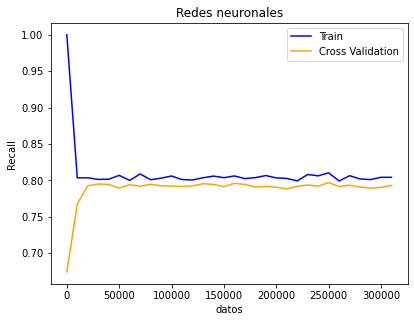

In [66]:
name = "RedesNeuronales_RS_"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,0.25,0.5,1,1.5, 2,3,4,5,6,7,10,15,20,25,30,50,100]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
X_train, Y_train = shuffle(X_train, Y_train)

neuronas = [1, 5, 10, 25, 50, 100, 250, 500, 1000]
for neur in neuronas:
    name_i = name + str(neur)
    main_RN_data(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, True, name_i, neur)

In [67]:
def main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name,num_hiden_layers):
    #Check del gradiente con reg
    #print(grad.checkNNGradients(backprop, reg))
    
    num_labels = 1
    
    num_entries = np.shape(X_train)[1]
    #num_hiden_layers = 5
    #reg = 0.01
    
    
    y = np.array([Y_train])
    y = y.T
    
    Y_val = np.array([Y_val])
    Y_val = Y_val.T
    errorV = []
    errorT = []
    Theta1F = []
    Theta2F  = []
    rangeVals = []
    Max = 0
    #print(y)
    for reg in lmb:
        rangeVals.append(reg)
        acc_val, acc_training, Theta1, Theta2 = optimize_backprop_training_validation(num_entries, num_hiden_layers, num_labels, reg, X_train, 250, y, 0.12, X_val, Y_val)
        errorV.append(acc_val)
        errorT.append(acc_training)
        if(acc_val > Max):
            Max = acc_val
            Theta1F = Theta1
            Theta2F = Theta2
            LambdaF = reg
    
    print("Best lambda value is: " + str(LambdaF))
    draw_learning_curve(errorT, errorV, "Redes neuronales", "datos", rangeVals)
    plt.savefig(name)
    acc= optimize_backprop_and_check_test ( X_test,Y_test, Theta1F, Theta2F)
    #Pruebas
    
    '''l = [0,0.05,0.1, 0.25, 0.5, 1,2 ,3 ,4, 5,10,20,100]
    g = [30, 50, 70, 100, 200, 300]
    for i in g:
        print("iteraciones: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, reg, X, y_onehot, i, y, 0.12)
            
    for i in l:
        print("Lambda: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, i, X, y_onehot, 70, y, 0.12)
    '''
    return acc

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: divide by zero encountered in log
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_1603/102326774.py:6: RuntimeWarning: invalid value encountered in multiply
  J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))


Best lambda value is: 10
              precision    recall  f1-score   support

          no       0.97      0.73      0.84     58485
          si       0.22      0.80      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959



0.7952137376689806

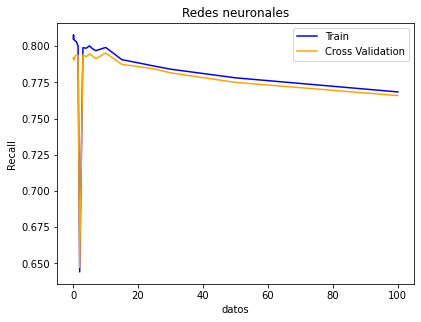

In [69]:
name = "RedesNeuronales_lmb_"

#DataFrame 
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

#lmb = [0,0.1,1,2]
lmb = [0,0.1,0.25,0.5,1,1.5,2,3,4,5,6,7,10,15,20,25,30,50,100]
#lmb = [8,9,9.5,10,10.5,11]
#lmb = [0,0.05, 0.1, 0.15, 0.2, 0.25]
#lmb = [50,60,70,80,90,95,100,105,110,120]
#lmb = 
#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
#X_train, Y_train = shuffle(X_train, Y_train)


main_RN_lambda(X_train, Y_train, X_val, Y_val, X_test, Y_test, lmb, name, 50)

## Redes neuronales SKlearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#Obtenemos los sets de test training y validación
X_train,Y_train, X_val,Y_val, X_test,Y_test = train_validation_test(X, Y, rus)
regul_param = 1
capas_oculta = 5

mlp=MLPClassifier(hidden_layer_sizes=capas_oculta, activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
         learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=1000)

# El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
scores = cross_val_score(mlp, X_train, Y_train, cv=2, scoring='recall')
print(scores)
#cv_scores_mean.append(scores.mean())
#cv_scores_std.append(scores.std())

In [ ]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(title)
    return ax

In [ ]:
def svm_linearKernel():
    
    #C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    C = [0.01, 0.1, 1, 10, 40]
    c = 0

    accAux = 0
    for i in C:
        svm_clf = svm.SVC(kernel='linear' , C=i)
        svm_clf.fit(X_svm_train, Y_svm_train)

        print("Finished fit")
        
        Y_svm_predict = svm_clf.predict(X_svm_test)

        print("Finished predicting")
        
        print(classification_report(Y_svm_test, Y_svm_predict, target_names=['normal', 'enfermo']))

        #Confusion Matrix
        title_img = "randomState_linearKernel" + str(i) + ".png"
        plot_confusion_matrix(Y_svm_test, Y_svm_predict, ['normal', 'enfermo'], normalize=True, title=title_img)
        print(confusion_matrix(Y_svm_test, Y_svm_predict))
        
        acc = svm_clf.score(X_svm_val, Y_svm_val)
        cross_score = cross_val_score(svm_clf, X_svm_val, Y_svm_val, cv=5, scoring='balanced_accuracy')
        print("Accuracy:", acc)
        print("AcurracyBalanced:", cross_score)
        print("\n---------------Finish---------------\n")
        """acc = svm_clf.score(X_svm_test, Y_svm_test)
        if (acc > accAux):
            accAux = acc
            c = i
        print(acc, "C =", i)
        print("accuraccy:", acc, "  C =", i, " Sigma =", j)"""

In [ ]:
def svm_gaussianKernel():
    
    #C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    #sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    C = [0.01, 0.1, 1, 10, 40]
    sigma = [0.01, 0.1, 1, 10, 40]
    c = 0
    sig = 0

    accAux = 0
    for i in C:
        for j in sigma:
            print("Execution:", i, j)
            svm_clf = svm.SVC(kernel='rbf' , C=i, gamma = (1 / (2 * j**2)))
            svm_clf.fit(X_svm_train, Y_svm_train)

            print("Finish fit")
            
            Y_svm_predict = svm_clf.predict(X_svm_test)

            print("Finished predicting")
            
            print(classification_report(Y_svm_test, Y_svm_predict, target_names=['normal', 'enfermo']))

            #Confusion Matrix
            title_img = "randomState_gaussianKernel_C" + str(i) + "_S" + str(j) + ".png"
            plot_confusion_matrix(Y_svm_test, Y_svm_predict, ['normal', 'enfermo'], normalize=True, title=title_img)
            print(confusion_matrix(Y_svm_test, Y_svm_predict))

            acc = svm_clf.score(X_svm_val, Y_svm_val)
            cross_score = cross_val_score(svm_clf, X_svm_val, Y_svm_val, cv=5, scoring='balanced_accuracy')
            print("Accuracy:", acc)
            print("AcurracyBalanced:", cross_score)
            
            """acc = svm_clf.score(X_svm_test, Y_svm_test)
            if (acc > accAux):
                accAux = acc
                c = i
                sig = j
            print("acc:", acc, "  C =", i, " Sigma =", j)"""

In [ ]:
#svm_linearKernel()

In [ ]:
svm_gaussianKernel()

Execution: 0.01 0.01
Finish fit
Finished predicting
              precision    recall  f1-score   support

      normal       0.97      0.18      0.30     58485
     enfermo       0.10      0.94      0.17      5474

    accuracy                           0.24     63959
   macro avg       0.53      0.56      0.24     63959
weighted avg       0.89      0.24      0.29     63959

Normalized confusion matrix
[[0.17785757 0.82214243]
 [0.06320789 0.93679211]]
[[10402 48083]
 [  346  5128]]
Accuracy: 0.24195187542019106
AcurracyBalanced: [0.5 0.5 0.5 0.5 0.5]
Execution: 0.01 0.1
Finish fit
Finished predicting
              precision    recall  f1-score   support

      normal       0.99      0.20      0.33     58485
     enfermo       0.10      0.97      0.18      5474

    accuracy                           0.26     63959
   macro avg       0.54      0.58      0.26     63959
weighted avg       0.91      0.26      0.32     63959

Normalized confusion matrix
[[0.19707617 0.80292383]
 [0.029411

In [ ]:
#Imbalanced learn para poner los datos equilibrados, dividir training, validacion y test
#Funciones recall, precision, F1
#SVM
#Cambiar hiperparametros
#ESCRIBIR MEMORIA